# Supplemental Figures

# Setup

In [8]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

from rna_motif_library.settings import DATA_PATH
from rna_motif_library.util import add_motif_indentifier_columns
from rna_motif_library.plotting import publication_style_ax

PLOT_PATH = "../../figures/plots"

## extra functions

In [9]:
def add_residue_count(df: pd.DataFrame) -> pd.DataFrame:
    """Add a column counting non-gap residues in each sequence.

    Args:
        df: DataFrame containing motif data with 'msequence' column

    Returns:
        DataFrame with additional 'residue_num' column counting non-gap characters
    """
    df["residue_num"] = df["msequence"].str.replace("-", "").str.len()
    return df


def rename_motif_types(df):
    """Rename motif type values to more readable format.

    Args:
        df: DataFrame containing motif data

    Returns:
        DataFrame with renamed motif types
    """
    type_mapping = {
        "HELIX": "Helix",
        "SSTRAND": "Single Strand",
        "TWOWAY": "Two-way",
        "NWAY": "N-way",
        "HAIRPIN": "Hairpin",
    }

    df["motif_type"] = df["motif_type"].map(type_mapping)
    return df

## load data

In [10]:
path = "../../data/summaries/non_redundant_motifs_no_issues.csv"
df_motifs = pd.read_csv(path)
df_motifs = add_motif_indentifier_columns(df_motifs, "motif_name")
df_motifs = df_motifs.query("mtype != 'UNKNOWN'")
df_motifs = add_residue_count(df_motifs)
# Apply the renaming
df_motifs = rename_motif_types(df_motifs)
path = "../../data/summaries/non_redundant_motifs.csv"
df_motifs_w_issues = pd.read_csv(path)
df_motifs_w_issues = add_motif_indentifier_columns(df_motifs_w_issues, "motif_name")
df_motifs_w_issues = df_motifs_w_issues.query("mtype != 'UNKNOWN'")
df_motifs_w_issues = add_residue_count(df_motifs_w_issues)
# Apply the renaming
df_motifs_w_issues = rename_motif_types(df_motifs_w_issues)

In [11]:
path = "../../data/summaries/all_motifs.csv"
df_all_motifs = pd.read_csv(path)
df_all_motifs = add_motif_indentifier_columns(df_all_motifs, "motif_id")
df_all_motifs = df_all_motifs.query("mtype != 'UNKNOWN'")
df_all_motifs["motif_type"] = df_all_motifs["mtype"]
df_all_motifs = add_residue_count(df_all_motifs)
# Apply the renaming
df_all_motifs = rename_motif_types(df_all_motifs)

In [12]:
df_pdb = pd.read_csv("../../data/csvs/rna_residue_counts.csv")

# Supplemental Info

## Motif type distribution for all motifs

In [13]:
# Count and display number of each motif type
motif_counts = df_all_motifs["motif_type"].value_counts()
print("Number of each motif type:")
print(motif_counts)

Number of each motif type:
motif_type
Helix            440134
Two-way          194815
Hairpin          150430
N-way             71592
Single Strand     63073
Name: count, dtype: int64


## Motif type distribution for non-redundant motifs

In [14]:
# Count and display number of each motif type
motif_counts = df_motifs["motif_type"].value_counts()
print("Number of each motif type:")
print(motif_counts)

Number of each motif type:
motif_type
Helix            34148
Single Strand    32230
Two-way          16235
Hairpin          15949
N-way             4525
Name: count, dtype: int64


## Cumulative length distribution

In [15]:
# Calculate sequence lengths and their percentages (including duplicates)
sequence_lengths = df_motifs["residue_num"]
length_counts = sequence_lengths.value_counts().sort_index()
length_percentages = length_counts / len(df_motifs) * 100

# Filter to only include lengths up to 25 nt and make cumulative
length_percentages = length_percentages[length_percentages.index <= 25]
cumulative_percentages = length_percentages.cumsum()

# Display the cumulative length percentages
print("\nCumulative Length Distribution Statistics (Including Duplicates):")
print(cumulative_percentages)


Cumulative Length Distribution Statistics (Including Duplicates):
residue_num
1     15.138669
2     18.264185
3     20.799907
4     32.670463
5     38.992307
6     54.526759
7     59.008410
8     68.006635
9     72.164288
10    79.423206
11    81.587397
12    85.585961
13    86.905235
14    89.955086
15    90.855297
16    92.583934
17    93.281403
18    94.447408
19    94.936316
20    95.687138
21    96.000466
22    96.412739
23    96.732857
24    97.029693
25    97.234375
Name: count, dtype: float64


# Supplemental Figures

## Supplemental Figure XXX: Number of unique sequences

number of unique motif sequences: 24763
Top 10 most common sequences:
      msequence  count
20307         U   4898
0             A   4294
12782         G   3172
5085          C   2569
6777      CC-GG   2272
14724     GC-GC   1551
1319      AC-GU   1006
15127   GCC-GGC    772
5953     CAG-CG    747
12785     GA-UC    721


/var/folders/lg/b_1r07zd7174kpbyfysdr7p0dxd870/T/ipykernel_83893/1929789140.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


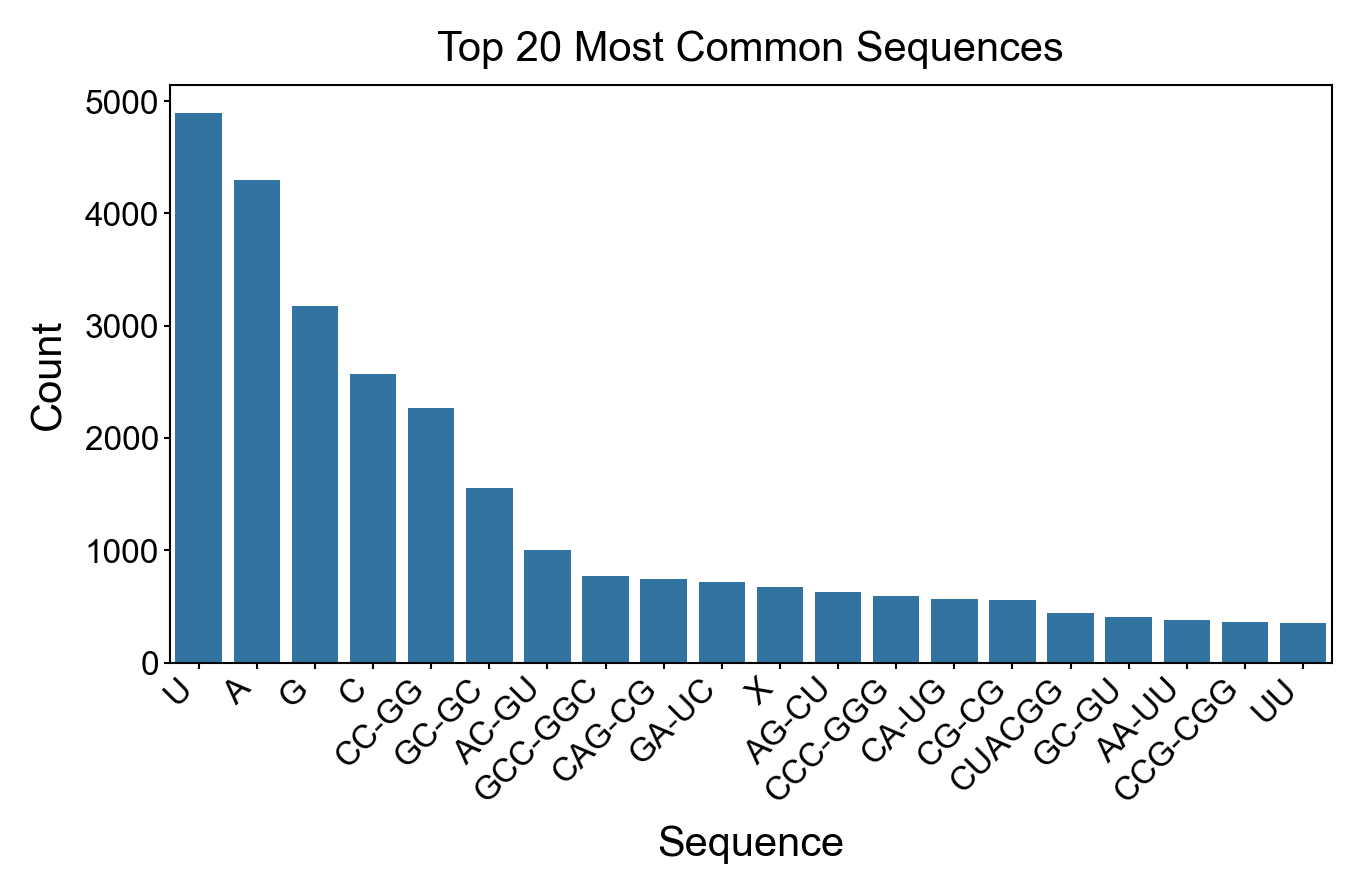

In [16]:
# Group by sequence and count occurrences
sequence_counts = df_motifs.groupby("msequence").size().reset_index(name="count")
sequence_counts = sequence_counts.sort_values("count", ascending=False)
print("number of unique motif sequences:", len(sequence_counts))

# Display top 10 most common sequences
print("Top 10 most common sequences:")
print(sequence_counts.head(10))

# Create a bar plot of top 20 sequences
fig, ax = plt.subplots(figsize=(5, 2.5), dpi=300)
top_20 = sequence_counts.head(20)
sns.barplot(x="msequence", y="count", data=top_20, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
ax.set_xlabel("Sequence")
ax.set_ylabel("Count")
ax.set_title("Top 20 Most Common Sequences")
publication_style_ax(ax)

## Supplemental Figure XXX: Sequence length distribution

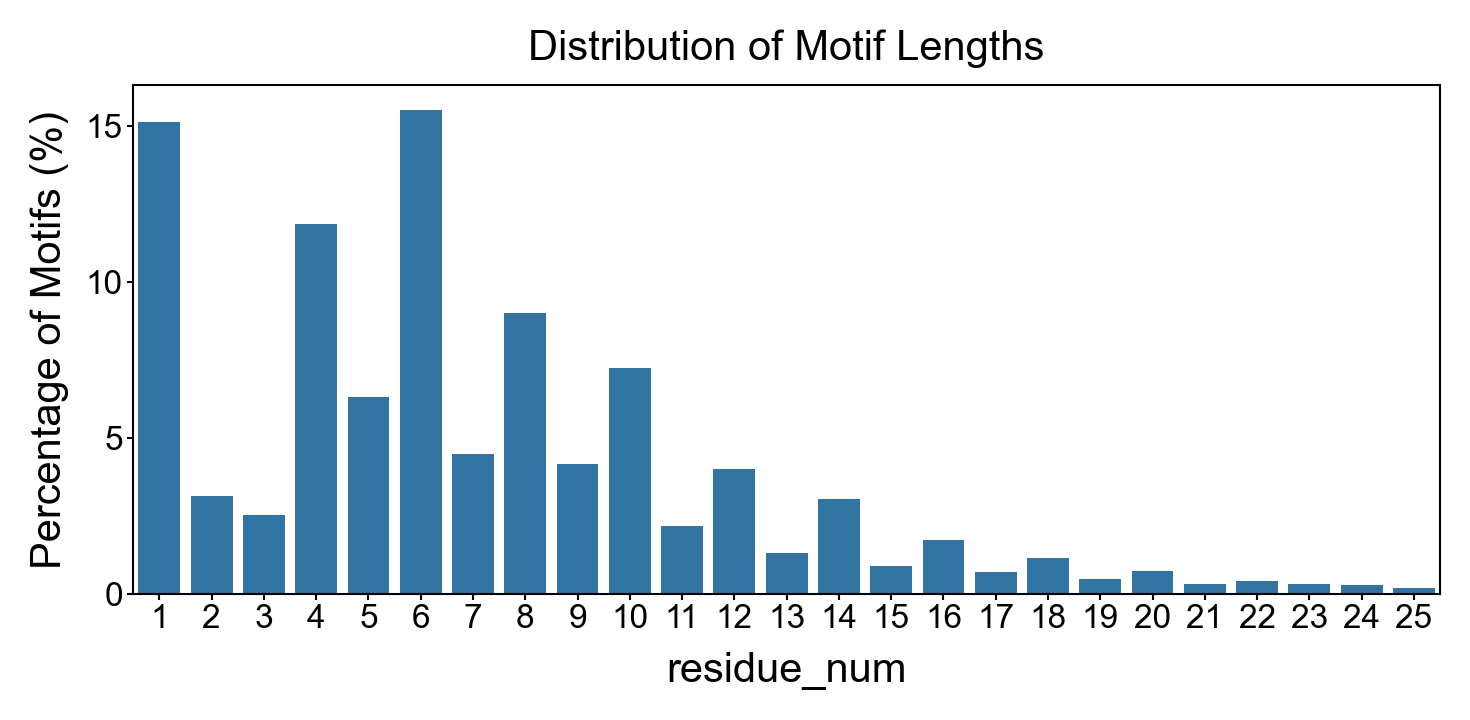

In [17]:
# Calculate sequence lengths and their percentages
sequence_lengths = df_motifs["residue_num"]
length_counts = sequence_lengths.value_counts().sort_index()
length_percentages = length_counts / len(df_motifs) * 100

# Filter to only include lengths up to 20 nt
length_percentages = length_percentages[length_percentages.index <= 25]

# Create the plot
fig, ax = plt.subplots(figsize=(5, 2.5), dpi=300)
sns.barplot(x=length_percentages.index, y=length_percentages.values, ax=ax)

# Customize the plot
ax.set_ylabel("Percentage of Motifs (%)")
ax.set_title("Distribution of Motif Lengths")

publication_style_ax(ax)
plt.tight_layout()

## Supplemental Figure XXX: Number of residues contained in motifs with issues

In [50]:
df_issues = df_motifs_w_issues.query("contains_helix == 1 and residue_num < 7")
print(len(df_issues["pdb_id"].unique()))
print(df_issues.iloc[0])

392
motif_name              TWOWAY-1-1-CGA-UCG-5E7K-1
motif_type                                Two-way
flanking_helices                              1.0
contains_helix                                1.0
has_singlet_pair                              0.0
has_singlet_pair_end                          0.0
mtype                                      TWOWAY
msize                                         1-1
msequence                                 CGA-UCG
pdb_id                                       5E7K
residue_num                                     6
Name: 81, dtype: object


In [46]:
print(len(df_issues))

5027


In [37]:
data = []
for pdb_id, g in df_issues.groupby("pdb_id"):
    res_count = 0
    for _, row in g.iterrows():
        res_count += len(row["msequence"].replace("-", ""))
    total_res_count = df_pdb.query("pdb_id == @pdb_id")["count"].values[0]
    data.append([pdb_id, len(g), res_count, total_res_count, g["motif_name"].values])
df_sum = pd.DataFrame(
    data, columns=["pdb_id", "n_motifs", "n_res", "total_res", "motif_ids"]
)

df_sum.sort_values("n_res", ascending=False).head(10)

,pdb_id,n_motifs,n_res,total_res,motif_ids
994,8EVP,6,1243,5385,"[TWOWAY-5-2-CUGAAUG-CGCG-8EVP-1, TWOWAY-15-9-A..."
574,6XU8,34,930,5912,[NWAY-40-10-5-2-AAUUGGAAUGAGUACACUUUAAAUCCUUUA...
1042,8GHU,24,925,1531,"[HAIRPIN-13-AGUUUGAUCAUGGCU-8GHU-1, NWAY-9-6-3..."
700,7MSH,38,851,4824,[NWAY-18-11-7-7-7-7-6-5-5-2-CGUGCCUUUUGAAGAAUG...
386,6D9J,32,824,5838,"[HAIRPIN-15-UCAGAUUAGGUAGUCGA-6D9J-1, NWAY-37-..."
637,7ASO,27,817,4249,[NWAY-18-12-7-AGGGAAUCUUCCGCAAUGGG-CCUGACGGAGC...
421,6I7V,35,741,9063,"[TWOWAY-3-2-GGAAA-UGCC-6I7V-1, HAIRPIN-6-UCGCA..."
3,1FKA,27,711,1479,"[SSTRAND-22-UGGAGAGUUUGAUCCUGGCUCA-1FKA-1, TWO..."
512,6SJ6,24,690,2697,[NWAY-13-10-8-6-5-3-3-1-1-CGGAGGAAGAGAAAG-AAGG...
521,6SWA,32,679,3888,"[TWOWAY-5-2-CUGAAUG-CGCG-6SWA-1, NWAY-20-13-12..."


In [51]:
print(len(df_sum.sort_values("n_res", ascending=True).query("n_res > 100")))

306


In [53]:
len(df_sum.query("n_res > 500"))

19

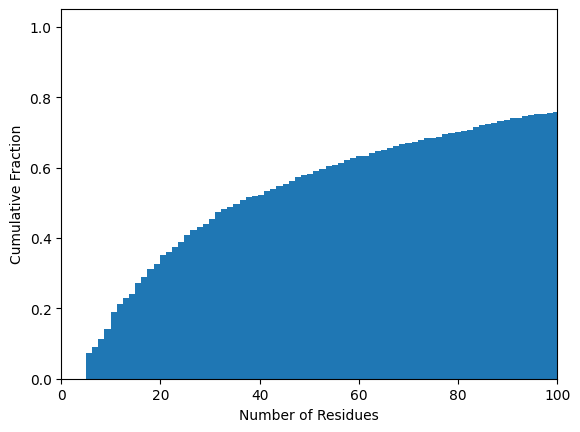

In [ ]:
plt.hist(df_sum["n_res"], bins=1000, cumulative=True, density=True)
plt.xlim(0, 100)
plt.ylabel("Cumulative Fraction")
plt.xlabel("Number of Residues")

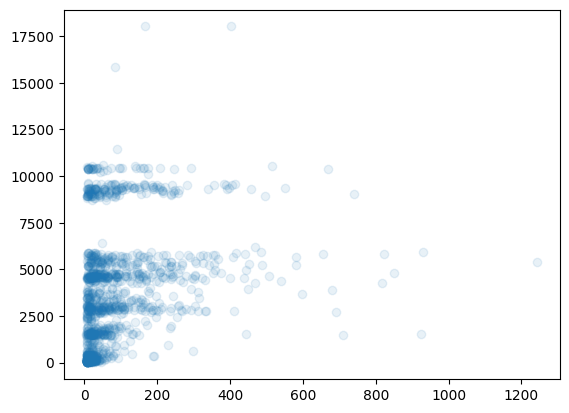

In [ ]:
plt.scatter(df_sum["n_res"], df_sum["total_res"], alpha=0.1)